# lab 11. Convolutional Neural Network Basics

In [ ]:
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sess = tf.InteractiveSession()

(1, 3, 3, 1)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


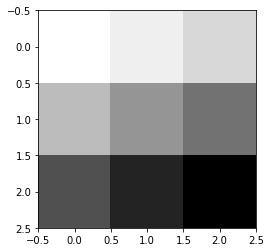

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
print(image.reshape(3,3))
plt.imshow(image.reshape(3,3), cmap='Greys') # (이미지 갯수, 행, 열, 칼라)
plt.show()

## with padding:VALID  
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

- filter (2,2,1,1) 
  - (rows, cols, colors, num of filter)


In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)


In [ ]:
conv2d_img

array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)

In [ ]:
conv2d_img.reshape(2,2)

array([[12., 16.],
       [24., 28.]], dtype=float32)

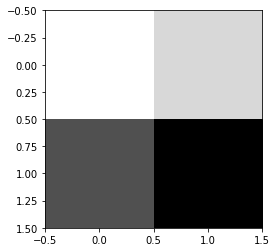

In [ ]:
plt.imshow(conv2d_img.reshape(2,2), cmap='Greys')
plt.show()

[[12. 16.]
 [24. 28.]]


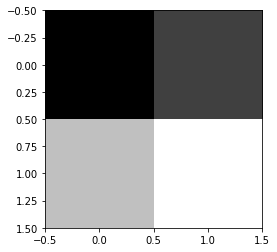

In [ ]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # (1, 2, 2, 1) -> (2, 2, 1, 1)
# for i, one_img in enumerate(conv2d_img):
print(conv2d_img.reshape(2,2))
# plt.subplot(1,2,1), 
plt.imshow(conv2d_img.reshape(2,2), cmap='gray')
plt.show()

## with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)
- 입력과 출력의 사이즈가 같도록 zero 패딩 추가

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


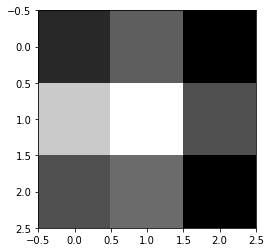

In [ ]:
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3), cmap='gray') # vmin, vmax 설정해야 지속적으로 균일한 비중의 그레이스케일 확인 가능
plt.show()

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


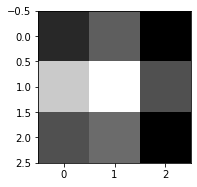

In [ ]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

In [ ]:
w = [[[[1.,10.,-1.]],
      [[1.,10.,-1.]]
      ],
    [[[1.,10.,-1.]],
      [[1.,10.,-1.]]]]
print(np.swapaxes(w,0,3)) 

[[[[ 1.  1.]]

  [[ 1.  1.]]]


 [[[10. 10.]]

  [[10. 10.]]]


 [[[-1. -1.]]

  [[-1. -1.]]]]


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


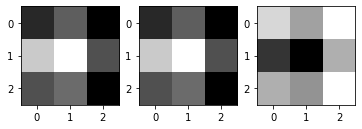

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[
                       [[1.,10.,-1.]],
                       [[1.,10.,-1.]]
                       ],
                      [
                       [[1.,10.,-1.]],
                       [[1.,10.,-1.]]]
                      ])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING
- subsampling
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)




In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


### SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)

In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## CNN for MNIST 

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
img = mnist.train.images[0]
img.shape, 28*28

((784,), 784)

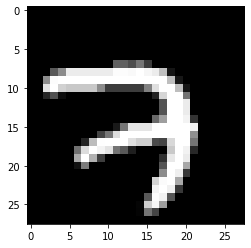

In [ ]:
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show() # 3

In [ ]:
# sess = tf.InteractiveSession()

### convolution layer

In [ ]:
img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) # 3 by 3 필터 5개

conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') # 스트라이드가 2이기 때문에 결과는 28/2, 1일 때만 결과가 28 by 28
print(conv2d)

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


In [ ]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

(1, 14, 14, 5)


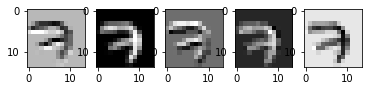

In [ ]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # (5, 14, 14, 1)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

### Max pooling
- subsampling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


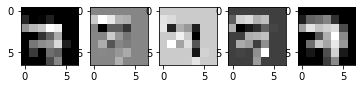

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], 
                      strides=[1, 2, 2, 1], padding='SAME') # output : 7 by 7 
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

# lab 11-02. MNIST and CNN

In [ ]:
import random

tf.set_random_seed(777)  # reproducibility

In [ ]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# L1 ImgIn shape=(n, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 32개 3 by 3
#    Conv     -> (n, 28, 28, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
#    Pool     -> (n, 14, 14, 32)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
'''
Tensor("Conv2D:0", shape=(n, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(n, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(n, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) # 64개 3 x 3 x 32
#    Conv      ->(?, 14, 14, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64]) # flatten!
'''
Tensor("Conv2D_1:0", shape=(n, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(n, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(n, 7, 7, 64), dtype=float32)

Tensor("Reshape_1:0", shape=(n, 3136), dtype=float32) # 결국 784 -> 3136으로 피쳐를 늘린 격
'''

'\nTensor("Conv2D_1:0", shape=(n, 14, 14, 64), dtype=float32)\nTensor("Relu_1:0", shape=(n, 14, 14, 64), dtype=float32)\nTensor("MaxPool_1:0", shape=(n, 7, 7, 64), dtype=float32)\n\nTensor("Reshape_1:0", shape=(n, 3136), dtype=float32) # 결국 784 -> 3136으로 피쳐를 늘린 격\n'

### Fully Connected (FC, Dense) layer

In [ ]:
# Final FC 7x7x64 inputs -> 10 outputs (0~9)
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Learning started. It takes some time.
Epoch: 0001 cost = 0.354294880
Epoch: 0002 cost = 0.092433759
Epoch: 0003 cost = 0.069626245
Epoch: 0004 cost = 0.055725562
Epoch: 0005 cost = 0.048464509
Epoch: 0006 cost = 0.041267055
Epoch: 0007 cost = 0.037005142
Epoch: 0008 cost = 0.032873563
Epoch: 0009 cost = 0.028132376
Epoch: 0010 cost = 0.025248599
Epoch: 0011 cost = 0.021944095
Epoch: 0012 cost = 0.019116232
Epoch: 0013 cost = 0.018336433
Epoch: 0014 cost = 0.015128196
Epoch: 0015 cost = 0.013101284
Learning Finished!
Accuracy: 0.9886
Label:  [6]
Prediction:  [6]


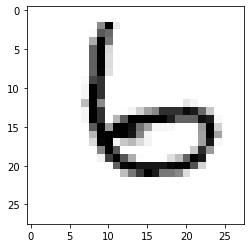

In [ ]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes some time.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) # axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

## Deep CNN
- \+ dropout

In [ ]:
tf.set_random_seed(777)  # reproducibility

In [ ]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [ ]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

In [ ]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Learning started. It takes sometime.
Epoch: 0001 cost = 0.444464728
Epoch: 0002 cost = 0.100339325
Epoch: 0003 cost = 0.072099498
Epoch: 0004 cost = 0.060251767
Epoch: 0005 cost = 0.054272441
Epoch: 0006 cost = 0.046135339
Epoch: 0007 cost = 0.041329080
Epoch: 0008 cost = 0.040489997
Epoch: 0009 cost = 0.036014026
Epoch: 0010 cost = 0.030862518
Epoch: 0011 cost = 0.031208278
Epoch: 0012 cost = 0.029982912
Epoch: 0013 cost = 0.028956370
Epoch: 0014 cost = 0.026987234
Epoch: 0015 cost = 0.024626304
Learning Finished!
Accuracy: 0.9933
Label:  [9]
Prediction:  [9]


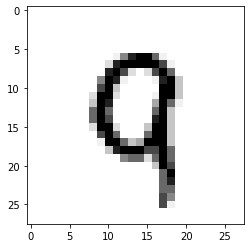

In [ ]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py
def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size): # mnist.train.images.shape[0]/512(batch_size) 는 정수가 아니기에 마지막 배치는 216행으로 512보다 작다.
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]
        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }
        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch # 배치 크기만큼 acc에 곱한다

    return correct_sample / N acc의 전체 합을 전체 크기로 나눠서 평균 acc를 구한다

print("\nAccuracy Evaluates")
print("-------------------------------")
print('Train Accuracy:', evaluate(mnist.train.images, mnist.train.labels))
print('Test Accuracy:', evaluate(mnist.test.images, mnist.test.labels))


Accuracy Evaluates
-------------------------------
Train Accuracy: 0.9977272726319053
Test Accuracy: 0.9932999999046326


In [ ]:
mnist.train.images.shape, mnist.train.images.shape[0]/512

((55000, 784), 107.421875)

In [ ]:
tmp =[]
for i in range(0, mnist.train.images.shape[0], 512):
  tmp.append(i)
print(tmp)

[0, 512, 1024, 1536, 2048, 2560, 3072, 3584, 4096, 4608, 5120, 5632, 6144, 6656, 7168, 7680, 8192, 8704, 9216, 9728, 10240, 10752, 11264, 11776, 12288, 12800, 13312, 13824, 14336, 14848, 15360, 15872, 16384, 16896, 17408, 17920, 18432, 18944, 19456, 19968, 20480, 20992, 21504, 22016, 22528, 23040, 23552, 24064, 24576, 25088, 25600, 26112, 26624, 27136, 27648, 28160, 28672, 29184, 29696, 30208, 30720, 31232, 31744, 32256, 32768, 33280, 33792, 34304, 34816, 35328, 35840, 36352, 36864, 37376, 37888, 38400, 38912, 39424, 39936, 40448, 40960, 41472, 41984, 42496, 43008, 43520, 44032, 44544, 45056, 45568, 46080, 46592, 47104, 47616, 48128, 48640, 49152, 49664, 50176, 50688, 51200, 51712, 52224, 52736, 53248, 53760, 54272, 54784]


In [ ]:
len(mnist.train.images[54784:54784 + 512])

216